Populating the interactive namespace from numpy and matplotlib
Image


/home/an/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


vietnam id (score = 0.84004)
dog (score = 0.05418)
cat (score = 0.05382)
foot (score = 0.03216)
hand (score = 0.01980)



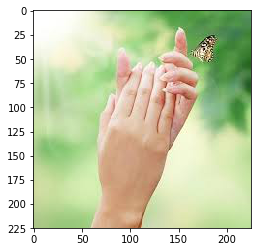

foot (score = 0.37849)
hand (score = 0.37129)
cat (score = 0.10296)
dog (score = 0.09981)
vietnam id (score = 0.04745)



hand (score = 0.40286)
foot (score = 0.20366)
dog (score = 0.15284)
cat (score = 0.13506)
vietnam id (score = 0.10557)



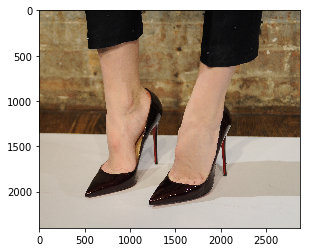

foot (score = 0.58279)
dog (score = 0.13854)
cat (score = 0.12592)
hand (score = 0.11270)
vietnam id (score = 0.04005)



hand (score = 0.81789)
foot (score = 0.11252)
vietnam id (score = 0.02539)
cat (score = 0.02243)
dog (score = 0.02176)



foot (score = 0.47330)
dog (score = 0.16997)
cat (score = 0.15899)
hand (score = 0.14390)
vietnam id (score = 0.05383)



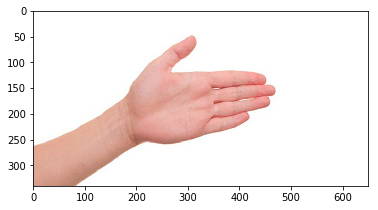

hand (score = 0.83108)
foot (score = 0.07726)
vietnam id (score = 0.03487)
cat (score = 0.02912)
dog (score = 0.02767)



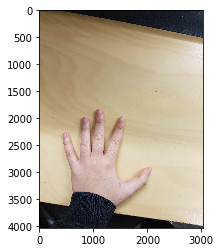

foot (score = 0.39531)
hand (score = 0.29275)
dog (score = 0.12899)
cat (score = 0.12407)
vietnam id (score = 0.05888)



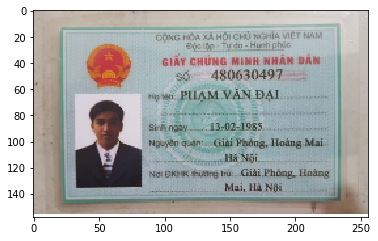

vietnam id (score = 0.79742)
cat (score = 0.06207)
dog (score = 0.06129)
foot (score = 0.05124)
hand (score = 0.02798)



In [8]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import sys
import os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


imgs = []
path = "/home/an/CV/week_3/Custom-Image-Classification-using-Inception-v3/test_image/"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.join(path,f)
    imgs.append(ext)
    
print("Image")
for link in imgs:
    image_path = link
    img=mpimg.imread(link)
    imgplot = plt.imshow(img)
    plt.show()
    
    image_data = tf.gfile.FastGFile(image_path, 'rb').read()
    label_lines = [line.rstrip() for line
                       in tf.gfile.GFile("tf_files/retrained_labels.txt")]

    with tf.gfile.FastGFile("tf_files/retrained_graph.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

    with tf.Session() as sess:
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
        predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            print('%s (score = %.5f)' % (human_string, score))
    print()

### We can see that the model works very well on CMND category and okay for foot category. The hand training set is sometimes mistakened with foot, maybe due to lack of data for it.